# World Happiness Report
## Kiran Benny
### 05/23/2020

## Introduction

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. The rankings of World Happiness Report 2019 use data that come from the Gallup World Poll. The rankings are based on answers to the main life evaluation questions asked in the poll, with the best possible life being a 10, and the worst possible life being a 0. The rankings are from nationally representative samples, based entirely on the survey scores, using the Gallup weights to make the estimates representative.

The purpose of this notebook is to analyze the Happiness Score of the 156 Countries using 3 different clustering algorithms, namely : K-Means Clustering, Agglomerative Clustering and Affinity Propagation and also to predict the Happiness Score using Linear Regression Model.

Let's begin by loading the required libraries and frameworks:

In [1]:
import numpy as np
import pandas as pd

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) #for maps

import seaborn as sns

import matplotlib.pyplot as plt #for graphics

from scipy.stats import norm
from scipy import stats

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.preprocessing import normalize #For normalization
from sklearn.preprocessing import LabelEncoder

#Clustering Models
from sklearn.cluster import KMeans #Kmeans clustering 
import scipy.cluster.hierarchy as sch #Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering #Agglomerative Clustering
from sklearn.cluster import AffinityPropagation #Affinity Propagation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

#Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score


Loading the dataset:

In [2]:
df = pd.read_csv(r'C:\Users\benny\OneDrive\Desktop\Misc\My Applications\Projects\World Happiness Report\2019.csv')
df.head(5) #Glimpse of the data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Data Cleaning

The data seems to be relatively clean. However, notice that the column names are separated by a space. Let's replace the space by an underscore character:

In [3]:
df.columns = df.columns.str.replace(' ', '_') #replacing column names containing spaces with _
df.head()

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Statistical Summary

In [4]:
#statistical summary
df.describe()

,Overall_rank,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [5]:
#data types
df.dtypes

Overall_rank                      int64
Country_or_region                object
Score                           float64
GDP_per_capita                  float64
Social_support                  float64
Healthy_life_expectancy         float64
Freedom_to_make_life_choices    float64
Generosity                      float64
Perceptions_of_corruption       float64
dtype: object

## Visualizing the data

Using plotly to visualize the countries on a world map based on their respective scores:

In [6]:
#Ref: https://plot.ly/python/choropleth-maps/
data1 = dict(type = 'choropleth', 
           locations = df['Country_or_region'],
           locationmode = 'country names',
             colorscale = 'Blues',
           z = df['Score'], 
           text = df['Country_or_region'],
           colorbar = {'title':'Happiness'}) 
layout1 = dict(title = 'Happiness Index 2019')
choromap1 = go.Figure(data = data1 , layout = layout1)
iplot(choromap1)

## Correlation 
Now lets take a look at how the variables correlate with each other using the correlation matrix.

[Text(0.5, 0, 'Score'),
 Text(1.5, 0, 'GDP_per_capita'),
 Text(2.5, 0, 'Social_support'),
 Text(3.5, 0, 'Healthy_life_expectancy'),
 Text(4.5, 0, 'Freedom_to_make_life_choices'),
 Text(5.5, 0, 'Generosity'),
 Text(6.5, 0, 'Perceptions_of_corruption')]

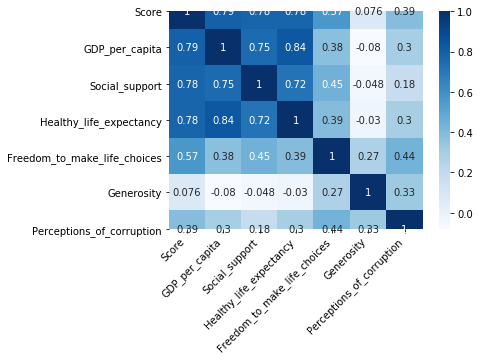

In [7]:
#correlation matrix

X = df[['Score','GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices', 'Generosity','Perceptions_of_corruption']] #Subsetting the data
Y = X #Subsetting for future use

cor = X.corr() #Calculate the correlation of the above variables
cm=sns.heatmap(cor, cmap = 'Blues', square = True, annot = True) #Plot the correlation as heat map
cm.set_xticklabels(cm.get_xticklabels(),
        rotation=45,
    horizontalalignment='right')

The color palette on the side represents the amount of correlation among the variables. Darker the shade, stronger the correlation. We can see that happiness score is highly correlated with GDP per capita, Social Support and Healthy life expectancy. It is least correlated with Generosity.

## Clustering

Clustering is the process of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. Clustering algorithms fall under the category of Unsupervised Learning Algorithms. 

Prior to clustering or applying any algorithm to data it is a good practice to scale and normalize the data. It helps handling disparities in units and during long processes it definitely helps speed up computation.

In [8]:
a = StandardScaler() 
a.fit_transform(X)
normalize(X)

array([[0.9550195 , 0.16472212, 0.19508508, ..., 0.07326446, 0.01880782,
        0.04831029],
       [0.95207674, 0.17325291, 0.19705483, ..., 0.07416177, 0.03156886,
        0.05136203],
       [0.94878312, 0.18689294, 0.19869935, ..., 0.07573686, 0.03403763,
        0.04282963],
       ...,
       [0.97442048, 0.10647742, 0.15728236, ..., 0.        , 0.04806695,
        0.00760553],
       [0.9938098 , 0.00838114, 0.        , ..., 0.0725291 , 0.07575261,
        0.0112823 ],
       [0.96725314, 0.10374324, 0.19494236, ..., 0.0033903 , 0.0684841 ,
        0.03085175]])

## K-means Clustering

K-means clustering is a clustering algorithm that aims to partition n observations into k clusters.

There are 3 steps:

1. K initial “means” (centroids) are generated at random
2. K clusters are created by associating each observation with the nearest centroid
3. Determine the new cluster center by computing the average of the assigned points

Steps 2 and 3 are repeated until none of the cluster assignments change.

## Choosing the right number of clusters (Elbow Method)

If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. We graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS). Then we select the number of clusters where the change in WCSS begins to level off.

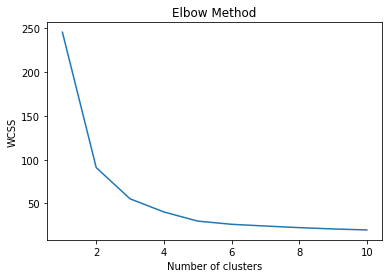

In [9]:
#Kmeans Clustering
#Elbow method to find the ideal number of clusters or k 

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=156, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#Choose 2 as the ideal number of clusters as it is the elbow or when the angle begins to appear

The graph exhibits an angle at the point '2'. Hence we will choose the number 2 as the number of clusters. 

In [10]:
kmeansc = KMeans(n_clusters=2)
y_kmeansc = kmeansc.fit_predict(X)
print(y_kmeansc) #the grouped data that has been grouped by kmeans algorithm

centroids = kmeansc.cluster_centers_ #getting the value of the means or centroids

kmeans_clustering = pd.DataFrame(y_kmeansc)
Y.insert((Y.shape[1]),'kmeans',kmeans_clustering) #inserting the kmeans groups data values into Y

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


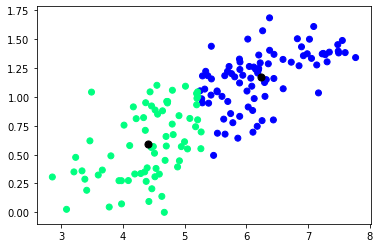

In [11]:
#Plotting the Clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeansc, cmap = 'winter') 
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=50) 

## Agglomerative Hieracrchial clustering


Agglomerative clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. It’s also known as AGNES (Agglomerative Nesting). 

Agglomerative clustering works in a “bottom-up” manner. That is, each object is initially considered as a single-element cluster (leaf). At each step of the algorithm, the two clusters that are the most similar are combined into a new bigger cluster (nodes). Pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named dendrogram.

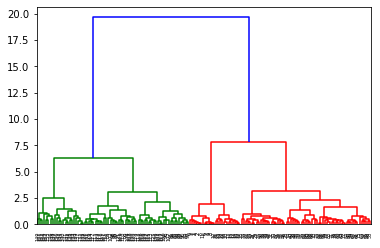

In [12]:
# create dendrogram
#n_clusters= 2, in hc = AgglomerativeClustering() to specify clusters manually otherwise the algorithm makes its own clusters
dendrogram = sch.dendrogram(sch.linkage(X,  method='ward'))
# create clusters
Agc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_Agc = Agc.fit_predict(X)


Agglomerative_Clustering = pd.DataFrame(y_Agc)
Y.insert((Y.shape[1]),'Agglomerative',Agglomerative_Clustering)

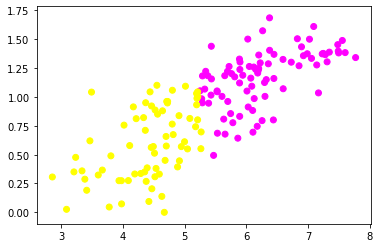

In [13]:
#Plotting the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_Agc, cmap = 'spring')

## Affinity Propagation

Affinity Propagation was first published in 2007 by Brendan Frey and Delbert Dueck in Science. In contrast to other traditional clustering methods, Affinity Propagation does not require you to specify the number of clusters.

Each data point sends messages to all other points informing its targets of each target’s relative attractiveness to the sender. Each target then responds to all senders with a reply informing each sender of its availability to associate with the sender, given the attractiveness of the messages that it has received from all other senders. Senders reply to the targets with messages informing each target of the target’s revised relative attractiveness to the sender, given the availability messages it has received from all targets. The message-passing procedure proceeds until a consensus is reached. Once the sender is associated with one of its targets, that target becomes the point’s exemplar. All points with the same exemplar are placed in the same cluster.

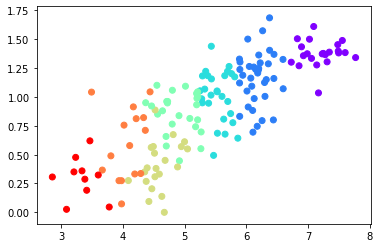

In [14]:
af = AffinityPropagation() 
clusters=af.fit_predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=clusters, cmap='rainbow') #This clustering method created 7 clusters based on its understanding of the data


Affinity_Propagation = pd.DataFrame(clusters)
Y.insert((Y.shape[1]),'Affinity_Propagation',Affinity_Propagation)

Now that we have seen how the different clustering algorithms have clustered the data, let's visualize them on a map to better understand the grouping of all the countries.

## Visualizing Clusters

## K-means

In [15]:
#Visualizing entire data kmeans clustering on a world map
Y.insert(0,'Country',df.iloc[:,1]) #inserting country names in Y 
data2 = dict(type = 'choropleth', 
           locations = Y['Country'],
           locationmode = 'country names',
             colorscale = 'Reds',
           z = Y['kmeans'], 
           text = Y['Country'],
           colorbar = {'title':'Cluster Group'})
layout2 = dict(title = 'Clustering of Countries based on K-Means')
choromap2 = go.Figure(data = data2, layout = layout2)
iplot(choromap2)

The K-means clustering algorithm has clustered the countries into two groups. Countries with a lower Happiness Score have a darker shade of red as compared to countries with a better Happiness Score.

## Agglomerative Clustering

In [16]:
#Visualizing entire data agglomerative clustering on a world map
#Y.insert(0,'Country',df.iloc[:,1]) #inserting country names in Y 
data3 = dict(type = 'choropleth', 
           locations = Y['Country'],
           locationmode = 'country names',
             colorscale = 'Reds',
           z = Y['Agglomerative'], 
           text = Y['Country'],
           colorbar = {'title':'Cluster Group'})
layout3 = dict(title = 'Clustering of Countries based on Agglomerative Clustering')
choromap3 = go.Figure(data = data3, layout = layout3)
iplot(choromap3)

Similar to the K-means Clustering Algorithm, the Agglomerative Heirarchial Clustering Algorithm has clustered the countries into two groups. Countries with a lower Happiness Score have a darker shade of red as compared to countries with a better Happiness Score.

## Affinity Propagation

In [17]:
#Visualizing entire data affinity propagation on a world map
#Y.insert(0,'Country',df.iloc[:,1]) #inserting country names in Y 
data4 = dict(type = 'choropleth', 
           locations = Y['Country'],
           locationmode = 'country names',
             colorscale = 'Reds',
           z = Y['Affinity_Propagation'], 
           text = Y['Country'],
           colorbar = {'title':'Cluster Group'})
layout4 = dict(title = 'Clustering of Countries based on Affinity Propagation')
choromap4 = go.Figure(data = data4, layout = layout4)
iplot(choromap4)

The Affinity Propagation Clustering Algorithm has clustered the countries into 7 groups as opposed to the other two clustering algorithms.

## Predicting the Happiness Score

We will try to predict the Happiness Score of the Countries using a Linear Regression Model. The visualizations below depict how the variables relate to the Happiness Score.

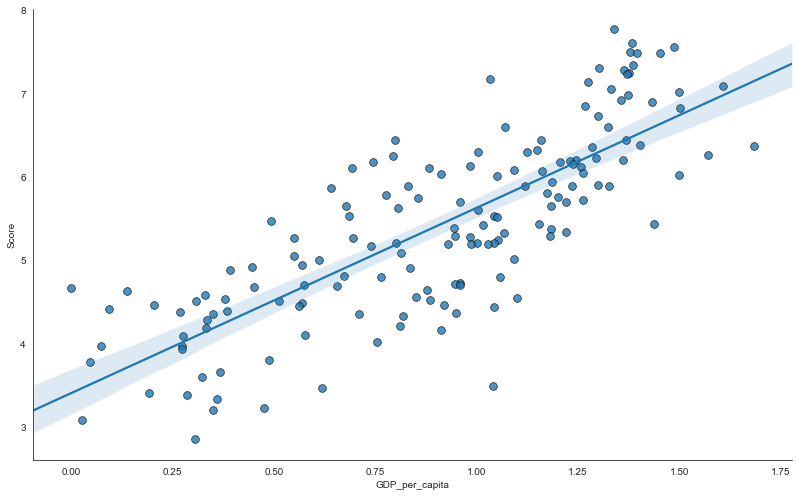

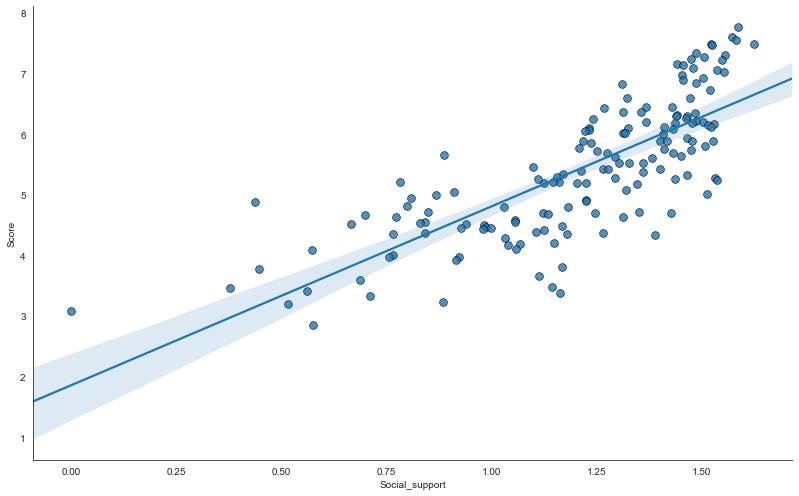

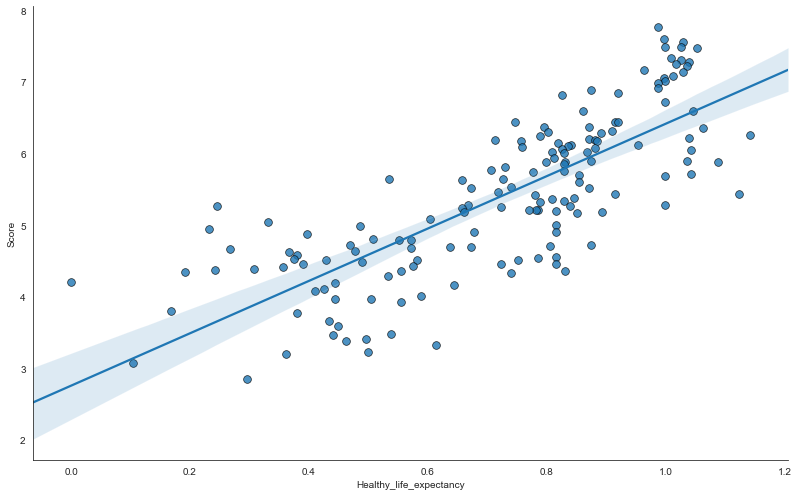

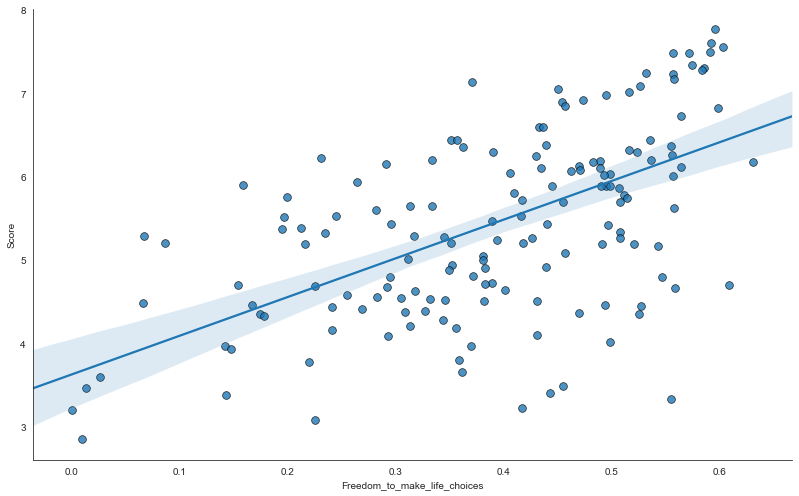

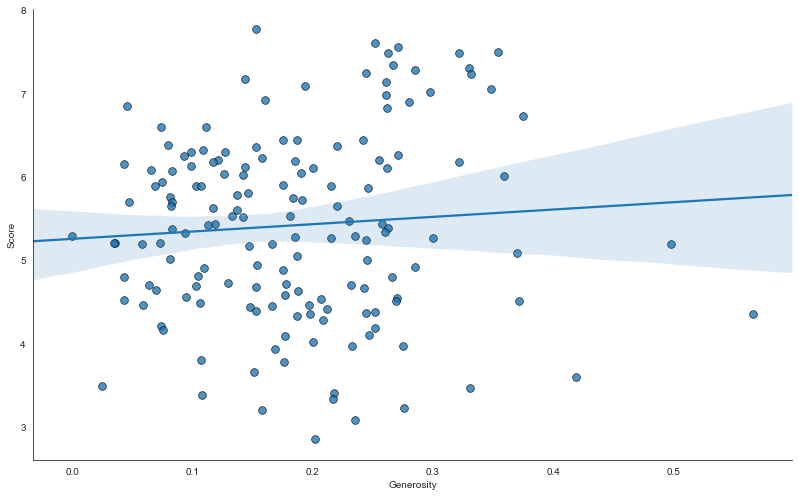

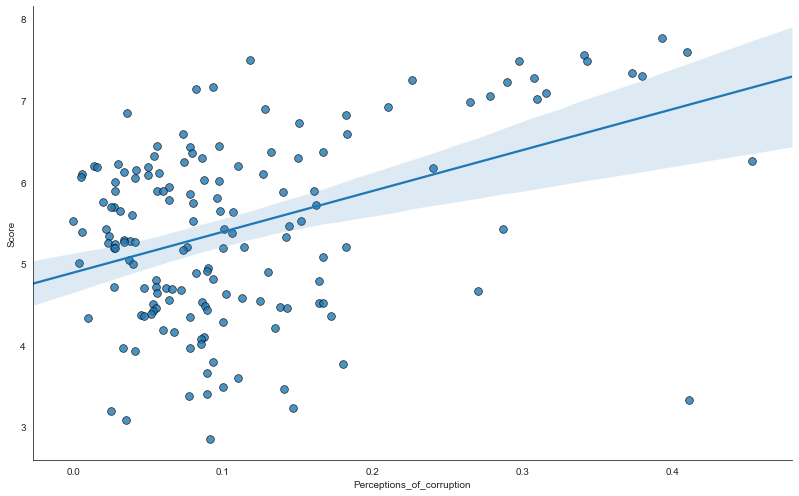

In [18]:

sns.set_style("white")

sns.lmplot(x="GDP_per_capita", y="Score", data = Y,  
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
sns.lmplot(x="Social_support", y="Score", data = Y, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
sns.lmplot(x="Healthy_life_expectancy", y="Score", data = Y, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
sns.lmplot(x="Freedom_to_make_life_choices", y="Score", data = Y, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
sns.lmplot(x="Generosity", y="Score", data = Y, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
sns.lmplot(x="Perceptions_of_corruption", y="Score", data = Y, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
#plt.setp(axes, yticks=[])
#plt.tight_layout()


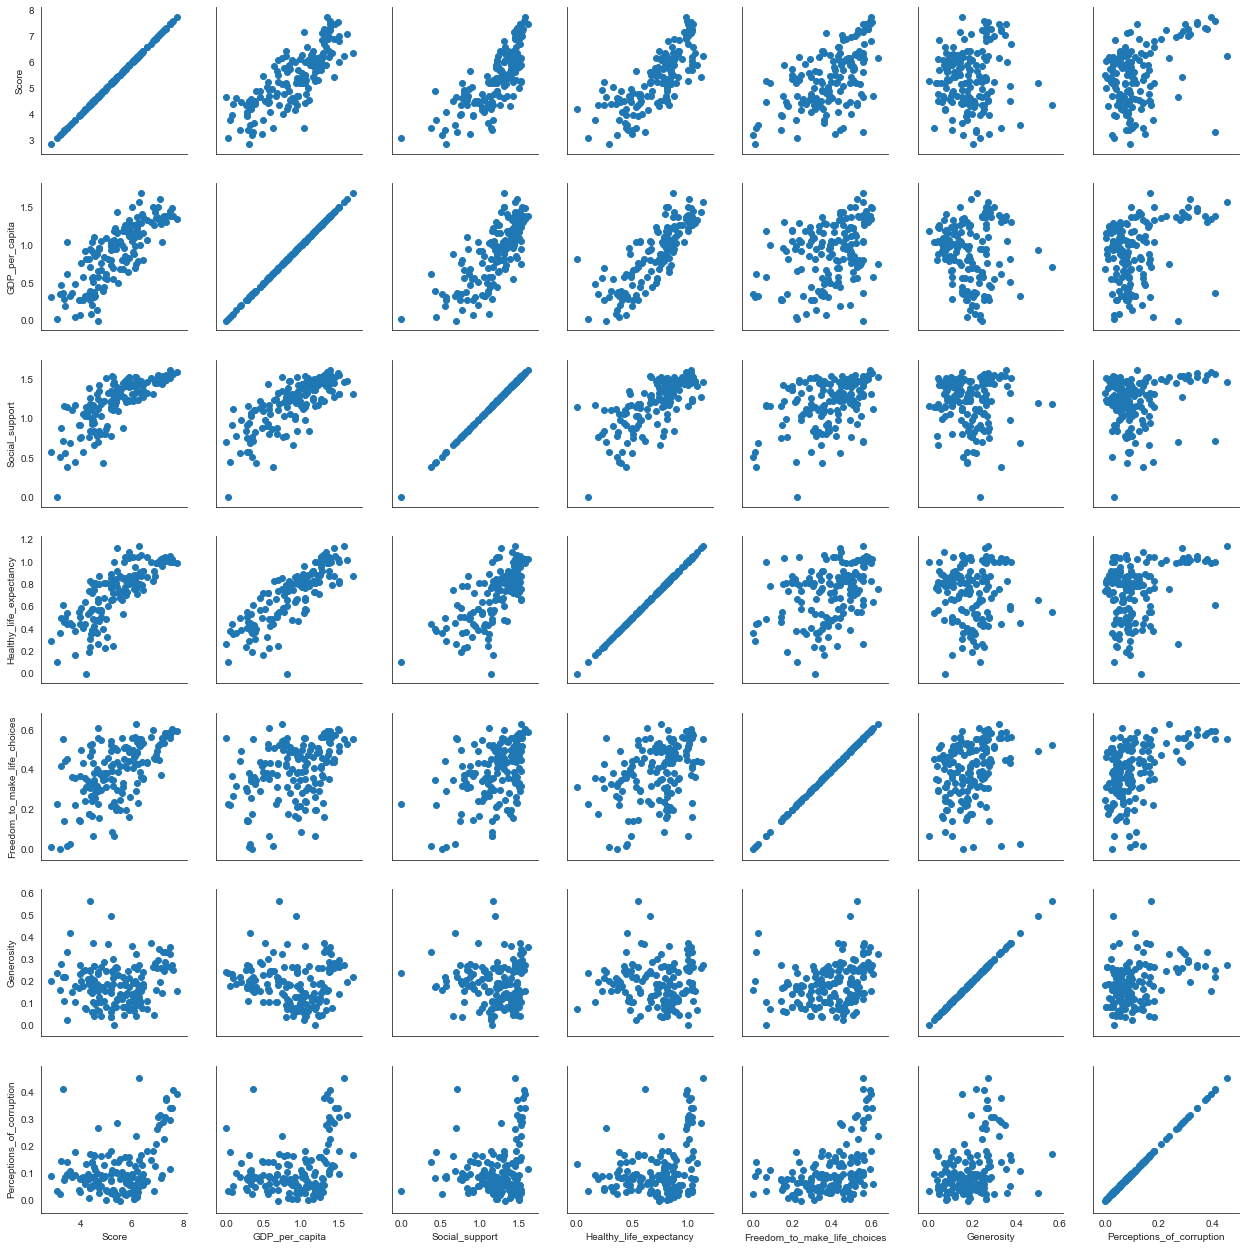

In [19]:
Z = df[['Score','GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices', 'Generosity','Perceptions_of_corruption']] #Subsetting the data
g = sns.PairGrid(Z)
g.map(plt.scatter);

## Linear Regression

Linear regression performs the task of predicting a dependent variable value (y) based on a given independent variable (x). This regression technique finds a linear relationship between x (input) and y (output). 

We will be using GDP per capita, Social support and Healthy life expectancy for prediction as they were most correlated to the Happiness Score. The dependent variable is Happiness Score, and the independent variables are GDP per capita, Social support and Healthy life expectancy.

Verifying the normal distribution of the data:

Text(0.5, 1.0, 'Score Distribution Plot')

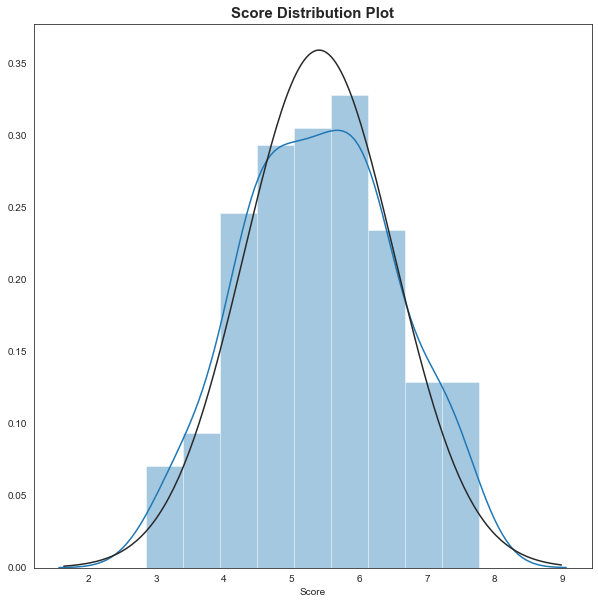

In [20]:
#Model Prediction
model = df[['GDP_per_capita','Social_support','Healthy_life_expectancy','Score']] #Subsetting the data

plt.figure(figsize=(10,10))
sns.distplot(Y['Score'], fit = norm)
plt.title("Score Distribution Plot",size=15, weight='bold')

The data appears to be normally distributed so we proceed with model building. First, X and Y are initialised and then we split the data into training set and test set - 80% of the data is used as the training set and 20% of the data is used as the test set. The linear model is trained using the training data set and the test data is used to predict the Happiness Score.

In [21]:
x, y = model.iloc[:,:-1], model.iloc[:,-1] #Initialising X and Y 

In [22]:
scaler = StandardScaler() #Scaling And Normalizing X 
x = scaler.fit_transform(x)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #Partitioning the data into training and test sets

In [24]:
regressor = LinearRegression()  #Computing the linear model
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pred = regressor.predict(X_test) #Predicting the Happiness Score using the test data

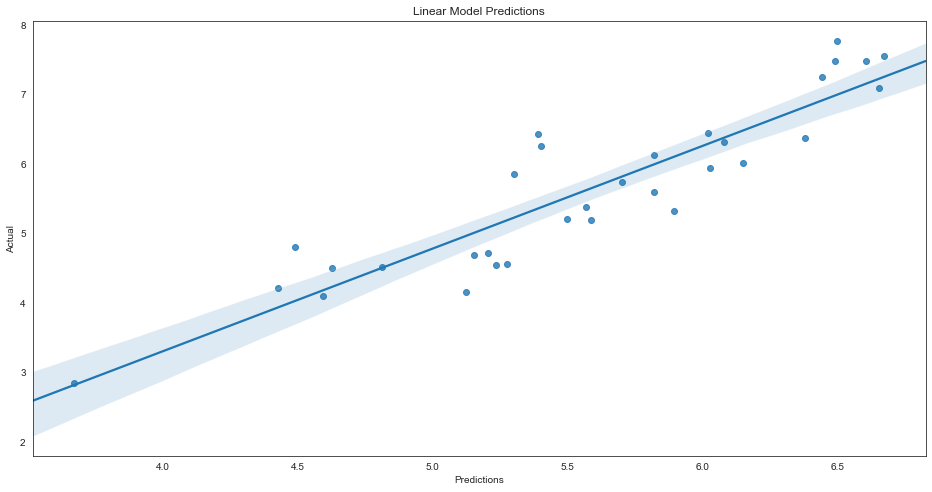

In [26]:
#Plotting the linear regression model
plt.figure(figsize=(16,8))
sns.regplot(y_pred,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()

Most of the data points appear to be close to the regression line indicating a good fit. Let's verify the fit of our linear model using some important validation scores:

Mean Absolute Error (MAE): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

A small MAE suggests the model is great at prediction, while a large MAE suggests that your model may have trouble in certain areas.

R-squared (R^2): R squared is a statistical measure of how close the data is to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

If it's a 1, the model 100% predicts the data variance; if it's a 0, the model predicts none of the variance. In general, the higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:', r2_score(y_test,y_pred))

Mean Absolute Error: 0.5053276411541366
Mean Squared Error: 0.36358468813539535
Root Mean Squared Error: 0.6029798405713042
R Squared: 0.7418165880278832


The R squared value is closer to 1 suggesting our model has a fairly good fit.

## Conclusion

This notebook explores Clustering algorithms - K-Means Clustering, Agglomerative Clustering and Affinity Propagation as applied to the Happiness Score of 156 Countries and Regression Model - Linear Regression to predict the Happiness Score. PCR, PLS, ridge, lasso and elastic net regression models can also be used to predict the Happiness Score.